In [1]:
# Importing all the libraries required for data analysis and visualisation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)   # adds background to the grapgh
sns.set_palette(palette = 'magma', n_colors = 8)   # set the default color palette 

In [2]:
# Library required to suppress any warning messages

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset from the directory

data = pd.read_csv('../input/cardio-good-fitness/CardioGoodFitness.csv')

# Data Structure Analysis

In [4]:
# Viewing random 10 observations in the dataset

data.sample(10) 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
96,TM498,24,Female,16,Single,3,3,50028,106
77,TM195,46,Female,16,Partnered,3,2,60261,47
176,TM798,42,Male,18,Single,5,4,89641,200
24,TM195,24,Male,14,Single,2,3,45480,113
117,TM498,31,Female,18,Single,2,1,65220,21
5,TM195,20,Female,14,Partnered,3,3,32973,66
171,TM798,33,Female,18,Partnered,4,5,95866,200
2,TM195,19,Female,14,Partnered,4,3,30699,66
177,TM798,45,Male,16,Single,5,5,90886,160
12,TM195,22,Female,16,Single,4,3,36384,75


* The sample data shows different model numbers of the Product
* Observations on customer's age, education, income and gender
* Observations on the average usage, average miles run/week and also the self fitness rating of the customers

In [5]:
# Checking the shape of the dataset

data.shape

(180, 9)

* There are 180 rows and 9 columns in the dataset

In [6]:
# Checking for all the different datatypes in the dataset

data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

* Among the 9 columns, Product, Gender and Marital Status are of 'object' datatype
* And the rest are all 'integer' datatype

In [7]:
# Converting 'object' data types to 'category' for further data analysis

data.Product = data.Product.astype('category')
data.Gender = data.Gender.astype('category')
data.MaritalStatus = data.MaritalStatus.astype('category')

In [8]:
# Checking the data types again

data.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

* Now we have 3 'category' and 6 'integer' datatypes columns in the dataset

In [9]:
# Checking for any missing values

data.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


* There doesn't seem to be any missing values.
* Confirming the same with the following step.

In [10]:
# Viewing the overall information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


* There are no missing values in the dataset
* There are 3 'category' and 6 'integer' columns
* Memory space utilisied by the data file is 12.8+ KB

In [11]:
# Checking the statistical summary of the numerical variables in the dataset 
# 'T' is to transpose the output

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* Customers range from 18 to 50 years of age.
* Customer age and income are both right skewed as the mean is greater than the median.
* The average education of the customers is 15.6 years.
* Maximum usage of the treadmill/week is 7 days whereas the minimum is only 2 days.
* The 1st, 2nd and the 3rd quartile values are same for both Usage and Fitness.
* The differnce between the 3rd quartlie and the maximum values of the Miles run indicates a significant number of outliers

In [12]:
# Checking the summary of non-numerical values in the dataset

data.describe(exclude = 'number').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


* There are 3 different Treadmill Models in the observations.
* Model number TM195 has the highest number of observations (80).
* Out of 180 observations, 104 are Male and the remaining 76 are Female.
* 107 observations were made on married customers.

In [13]:
# Checking the different Model numbers of the treadmill as the data analysis is based on that.

data.Product.unique()

['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']

* There are a total of 3 unique treadmill models in the dataset

In [14]:
# Grouping the data based on the model number

model_no_grp = data.groupby([data.Product])

In [15]:
# Checking the number of observations available for each model number

model_no_grp.size()

Product
TM195    80
TM498    60
TM798    40
dtype: int64

* There are three unique models of treadmills under observation.
* Model number 'TM195' has the maximum of 80 observations.
* Model number 'TM498' has 60 observations in all.
* Model number 'TM798' has only 40 observations, which is only the half of 'TM195'.
* This could create a significant impact in the comparative analysis of the products.

In [16]:
# Individually analysing the numerical values based on the Model No.

# Looking for the minimum value

model_no_grp.min()    

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,18,12,2,1,29562,38
TM498,19,12,2,1,31836,21
TM798,22,14,3,3,48556,80


* Among all the minimum values, model number 'TM798' has larger values in all the columns compared to the other two models.

In [17]:
# Looking for the maximum value 

model_no_grp.max()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,50,18,5,5,68220,188
TM498,48,18,5,4,67083,212
TM798,48,21,7,5,104581,360


* Model 'TM195' has the maximum customer age of 50 ; also the lowest among the maximum miles run.
* Model 'TM798'has the highest values of observations in Education and Income of the customers ; also highest usage/week along with the miles run and fitness score

In [18]:
# Looking for the mean of the values 

model_no_grp.mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


* Model number 'TM798' has the highest average values in all aspects comparatively.

In [19]:
# Looking for the standard deviations for each category

model_no_grp.std()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,7.221452,1.216383,0.782624,0.664540,9075.783190,28.874102
TM498,6.645248,1.222552,0.799717,0.629770,8653.989388,33.263135
TM798,6.971738,1.639066,0.946993,0.667467,18505.836720,60.066544


* Income and Miles have highest deviation from the Mean
* Usage and Fitness have the lowest deviation from the Mean

# Analysing the relationships between numerical variables

In [20]:
data_correlation = data.corr()   # finding the correlation between values and assigning the same to the variable data_correlation
data_correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Heatmap

<AxesSubplot:>

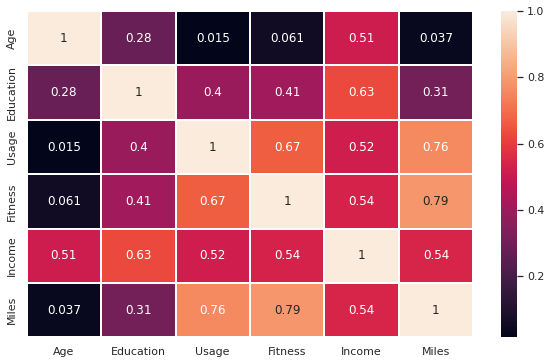

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data_correlation, annot=True, linewidths = 0.2, linecolor = 'white')

Positive correlations spotted between the following:

* Usage and Miles (very strong)
* Miles and Fitness (very strong)
* Usage anf Fitness (strong)
* Education and income (strong)
* Miles and income
* Fitness and income
* Usage and income
* Age and income

### Pairplot

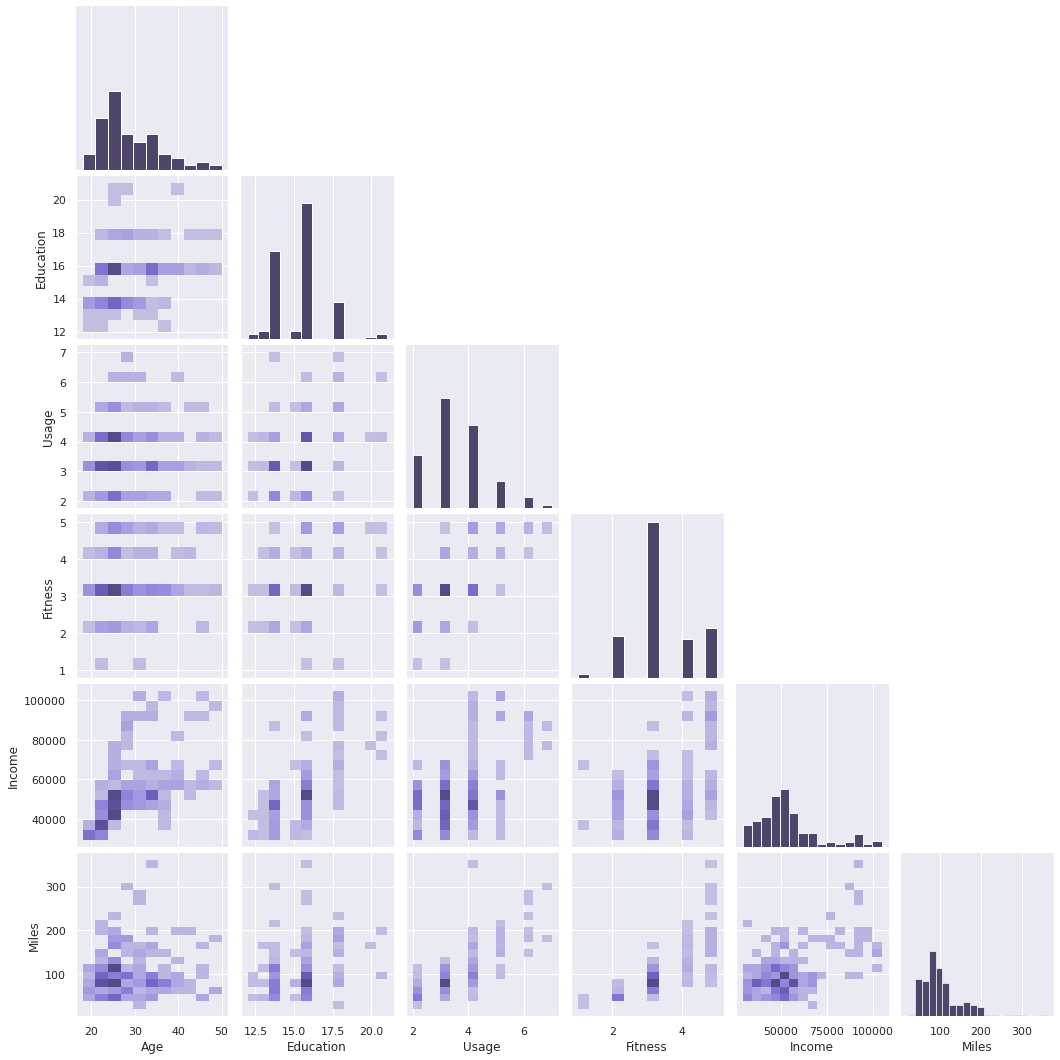

In [22]:
sns.pairplot(data, corner = True, kind = 'hist')

We get the same insights as from the above heatmap. Need to confirm the same with further analysis.

# Univariate Analysis of Categorical Data

In [23]:
# Defining a method to print the percentage of data values in the plots

def bar_perc(plot, feature):
    total = len(feature)      # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)      # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05        # width of the plot
        y = p.get_y() + p.get_height()                  # height of the plot
        ax.annotate(percentage, (x, y), size = 12)      # annotate the percentage

**1. Product**

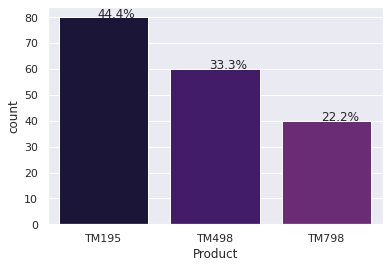

In [24]:
ax = sns.countplot(data['Product'])     # creating a countplot and assigning that to a variable ax
bar_perc(ax, data['Product'])           # calling the method bar_perc and passing ax as the argument to get the percentages 
                                        # labelled on the graph

* Model 'TM195' has a maximum of 44.4% of the total observations
* Model 'TM498' has 33.3% of the total observations and
* Model 'TM798' has the minium of 22.2% of the total observations made.

**2. Gender**

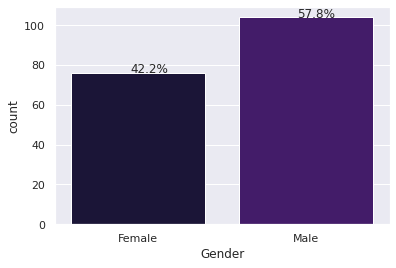

In [25]:
ax = sns.countplot(data['Gender'])
bar_perc(ax, data['Gender'])

* The observations consist of 57.8% of Male and 42.2% of Female customers.

**3. Marital Status**

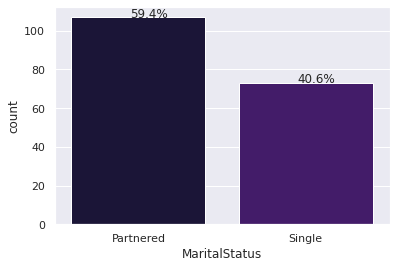

In [26]:
ax = sns.countplot(data['MaritalStatus'])
bar_perc(ax, data['MaritalStatus'])

* About 59.4% of cutomers are married and 40.6% of customers are unmarried.

# Univariate Analysis of Numerical Data

**1. Age**

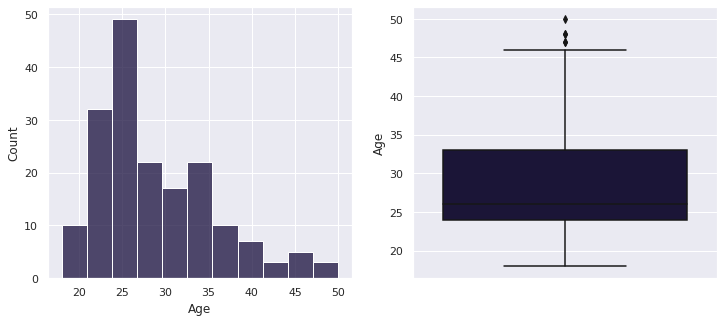

In [27]:
plt.figure(figsize = (12,5))    # defining the image size
plt.subplot(1,2,1)              # specifying the placement of the 1st subplot
sns.histplot(data.Age)          # creating a histplot as the 1st subplot
plt.subplot(1,2,2)              # specifying the placement of the 2nd subplot
sns.boxplot(y = data.Age)       # creating a boxplot as the 2nd subplot
plt.show()                      # displaying both subplots

* The minimum age of the customers is 18 and the maximum is 46 with outliers ranging until 50.
* The interquartile range (IQR) is inbetween 24 and 33 years.
* Age is a right skewed distribution.

**2. Education**

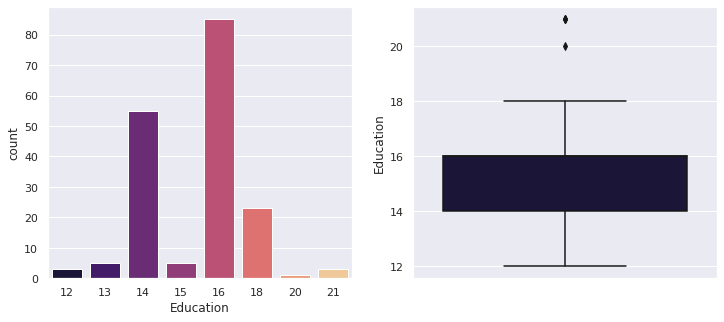

In [28]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)   
sns.countplot(data.Education)     # creating a countplot as the 1st subplot
plt.subplot(1,2,2)
sns.boxplot(y = data.Education)   # creating a boxplot as the 2nd subplot
plt.show()

* On an average, the customers have a minimum 12 year and a maximum 18 years of education with outliers ranging until 21 years.
* The IQR is between 14 to 16 years; 16 years being the highest qualification.
* There are no customers with 13,17 years of education.
* Education is right skewed.

**3. Usage**

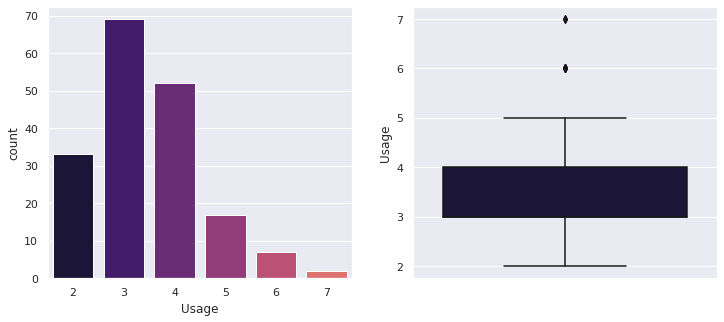

In [29]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)   
sns.countplot(data.Usage)
plt.subplot(1,2,2)
sns.boxplot(y = data.Usage)
plt.show()

* On an average the minimum number of days the treadmill is used 2 days/week
* A large number of customers use the treadmill for 3 days/week
* A significant number of them used the product for 4 days/week
* The outliers indicate that there are considerably a very few customers who use the treadmill for more than 6 days/week.
* Usage is right skewed.

**4. Fitness**

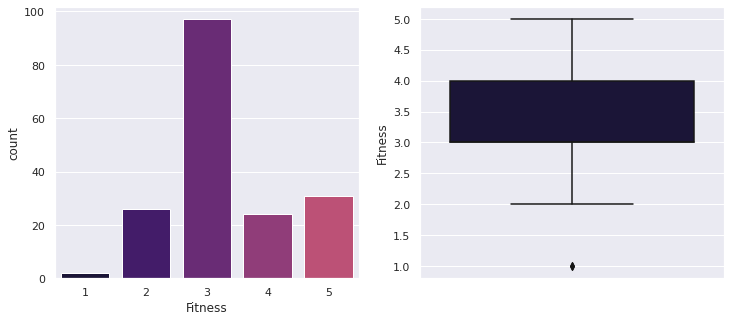

In [30]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)   
sns.countplot(data.Fitness)
plt.subplot(1,2,2)
sns.boxplot(y = data.Fitness)
plt.show()

* The self rated fitness score of the customers range from 'unfit' (rating 2) to 'very fit' (rating 5)
* There are outliers for 'very unfit' (rating 1)
* Maximum number of customers have rated their fitness level as 3
* Quite a handful of them have given the maximum of 5
* Fitness is right skewed (Mean = 3.31, Median = 3)

**5. Income**

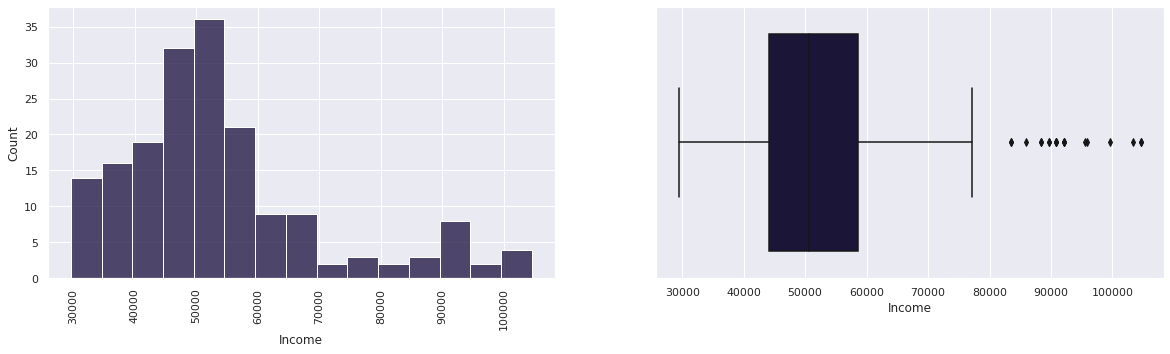

In [31]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)  
sns.histplot(data.Income)  
plt.xticks(rotation = 90)     # rotating the x-labels for a better visibility
plt.subplot(1,2,2)
sns.boxplot(data.Income)
plt.show()

* The minimum value of the average annual income of the customer is about 30k whereas the maximum is around 77k with outliers ranging upto 104k+.
* The IQR ranges between 43k to 58k.
* Income is right skewed.

**6. Miles expected to run per week**

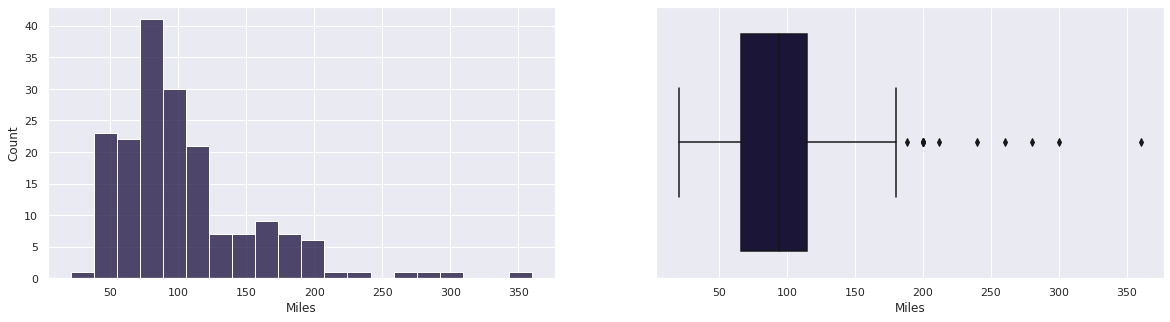

In [32]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)   
sns.histplot(data.Miles)
plt.subplot(1,2,2)
sns.boxplot(data.Miles)
plt.show()

* The minimum number of miles expected to run is around 21 miles/week and the maximum is around 180 miles/week.
* The outliers are ranging until around 360 miles/week.
* On an average the highest number of miles run/week aboout 43 miles.
* Miles/week is right skewed.

# Bivariate Analysis of Numerical Data

** 1. Age vs Usage**

<AxesSubplot:xlabel='Age', ylabel='Usage'>

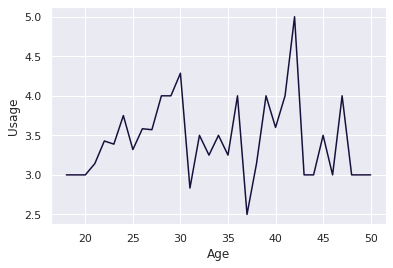

In [33]:
sns.lineplot(x = 'Age', y = 'Usage', data = data, ci = None)   # creating lineplot with confidence interval (ci) set to None

* Customers of age 40 to 43 years, have the maximum usage per week
* There is a steep drop in the usage by customers in their late 30s, after which the average usage per week gradually increases.
* Customers in their mid 40's use the treadmill for 3 to 4 days per week
* Whereas customers in their late 40's to 50's use the treadmill consistently for 3 days/week only.
* Overall age does not seem to drastically affect the use of the treadmill.

**2. Age vs Miles**

<AxesSubplot:xlabel='Age', ylabel='Miles'>

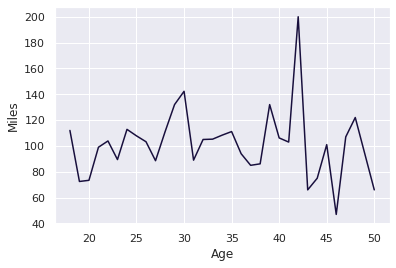

In [34]:
sns.lineplot(x = 'Age', y = 'Miles', data = data, ci = None)

* Customers of age 40 to 42 years run the maximum number of miles
* Customers in their late 20's, late 30's and late 40's seem to show a close pattern
* Miles run/week shows a steep drop in customers of age 42-43 and 45-47

**3. Age vs Fitness**

<AxesSubplot:xlabel='Age', ylabel='Fitness'>

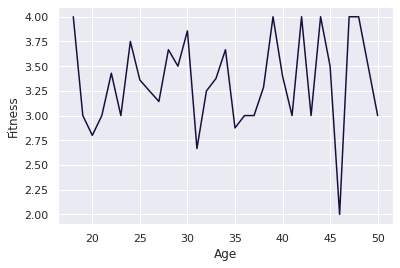

In [35]:
sns.lineplot(x = 'Age', y = 'Fitness', data = data, ci = None)

* Customers about 45-46 years of age have the lowest fitness rating
* We can also see a drop in fitness level rating by customers in their early 30's
* 4 rating is common among the customers of age 47-48

**4. Usage vs Miles**

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

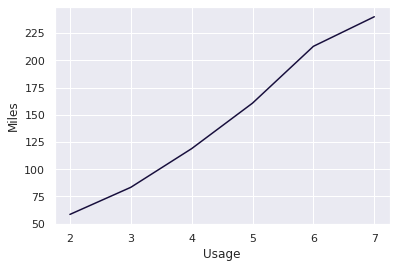

In [36]:
sns.lineplot(x = 'Usage', y = 'Miles', data = data, ci = None)

* Miles run/week has a positive correlation with the average usage/week

**5. Usage vs Fitness**

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

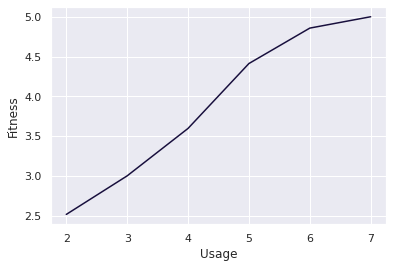

In [37]:
sns.lineplot(x = 'Usage', y = 'Fitness', data = data, ci = None)

* Fitness level rating increases with the increase in average usage/week.

**6. Fitness vs Miles**

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

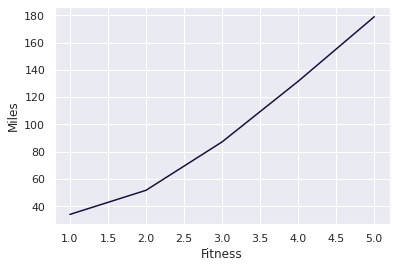

In [38]:
sns.lineplot(x = 'Fitness', y = 'Miles', data = data, ci = None)

* Fitness level increases with the increase in miles run/week
* Fitness is in positive correlation with miles run/week

**7. Income vs Miles**

<AxesSubplot:xlabel='Income', ylabel='Miles'>

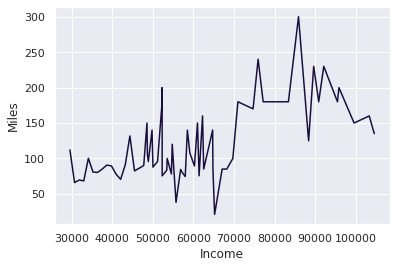

In [39]:
sns.lineplot(x = 'Income', y = 'Miles', data = data, ci = None)

* Customers with an average annual income more the 70k seem to run miles ranging anywhere between 120 and 300 miles
* Whereas the average number of miles run/week by customers under 70k income is 150 miles and the highest is 200 miles

# Bivariate Analysis of Categorical Data

**1. Product vs Gender**

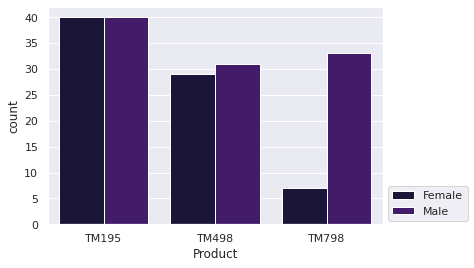

In [40]:
sns.countplot(x = 'Product', data = data, hue = 'Gender')
plt.legend(bbox_to_anchor = (1,0.2))                      # specifying the position of the labels mentioned in the key

* 'TM195' is equally preferred by both genders
* There is a very little difference between genders choosing 'TM498'
* 'TM798' seems to be highly preferred by Male customers comparatively.

**2. Marital Status vs Gender**

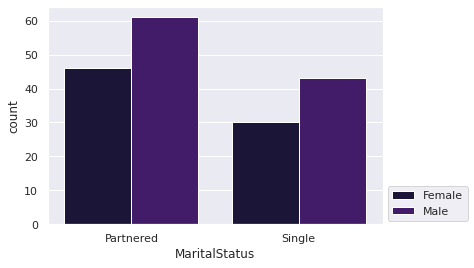

In [41]:
sns.countplot(x = 'MaritalStatus', data = data, hue = 'Gender')
plt.legend(bbox_to_anchor = (1,0.2))

* Married or unmarried, Male customer's out number in both cases.

**3. Product vs Marital Status**

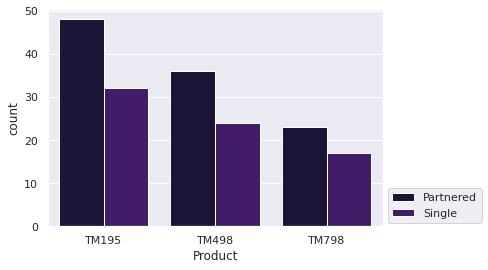

In [42]:
sns.countplot(x = 'Product', data = data, hue = 'MaritalStatus')
plt.legend(bbox_to_anchor = (1,0.2))

* In comparison, the number of married customers is more for each model.

# Bivariate Analysis of Categorical vs Numerical Data

**1. Product vs Age**

<AxesSubplot:xlabel='Product', ylabel='Age'>

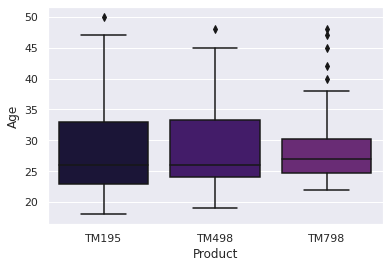

In [43]:
sns.boxplot(x = 'Product', y = 'Age', data = data)   # creating a boxplot

**'TM195'**
* Minimum age of the customers is 18 and the maximum is 47
* IQR is between 23 and 33
* very few outliers above maximum age

**'TM498'**
* Minimum age of the customers is 19 and the maximum is 45
* IQR is between 24 and 34
* very few outliers above maximum age

**'TM798'**
* Minimum age of the customers is 22 and the maximum is 38
* IQR is between 25 and 30
* Significant number of outliers above the maximum age

**Insight**
* May be model TM798 is not affordale to customers below 22 years of age

**2. Product vs Usage**

<AxesSubplot:xlabel='Product', ylabel='Usage'>

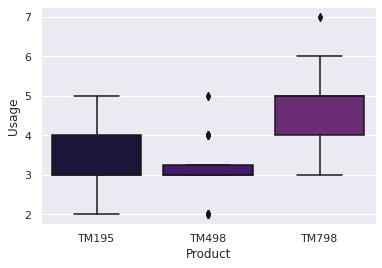

In [44]:
sns.boxplot(x = 'Product', y = 'Usage', data = data)

**'TM195'**
* Used minimum 2 days/week and maximum 5 days/week on an average
* IQR is between 3-4 days/week
* No outliers spotted

**'TM498'**
* No explicit minimum and maximum days/week
* IQR is around 3 days/week
* Outliers on both sides

**'TM798'**
* Used minimum 3 days/week and maximum 6 days/week
* IQR is between 4-5 days/week
* Vew few outliers above the maximum value

**3. Product vs Miles**

<AxesSubplot:xlabel='Product', ylabel='Miles'>

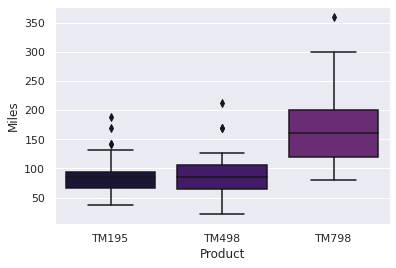

In [45]:
sns.boxplot(x = 'Product', y = 'Miles', data = data)

**'TM195'**
* Minimum miles run/week is 48 and maximum is 140, with outliers ranging until 200 miles/week
* IQR is between 60-98 miles/week

**'TM498'**
* Minimum miles run/week is about 20 and maximum is 130, with outliers until about 210 miles/week
* IQR is between 58-110 miles/week

**'TM798'**
* Minimum miles run/week is 80 and maximum is 300, with outliers until about 360 miles/week

**4. Product vs Fitness**

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

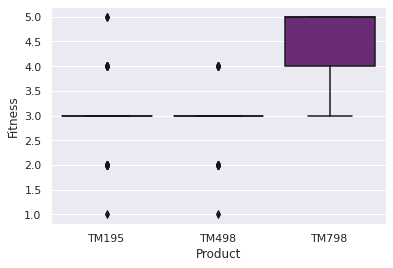

In [46]:
sns.boxplot(x = 'Product', y = 'Fitness', data = data)

**'TM195'**
* Average fitness rating of the customers is 3
* Few outliers ranging between 1 and 5

**'TM498'**
* Average fitness rating of the customers is 3
* Few outliers ranging between 1 and 4

**'TM478'**
* Minimum fitness rating is 3
* IQR ranges between 4 and 5
* No outliers spotted

**5. Product vs Income**

<AxesSubplot:xlabel='Product', ylabel='Income'>

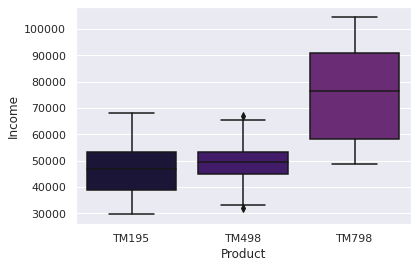

In [47]:
sns.boxplot(x = 'Product', y = 'Income', data = data)

**'TM195'**
* Minimum average annual income is 30k and the maximum is 68k
* IQR ranges between 39k-53k

**'TM498'**
* Minimum average annual income is 32k and the maximum is 67k with very litte outliers on both sides
* IQR ranges between 43k-53k

**'TM798'**
Minimum average annual income is 48k and the maximum is 104k
IQR between 58k-91k

**Insights**
* It could be an indicator that model TM798 is priced high
* Which in turn suggets that it is not affordable to cutomers with low annual income

**6. Product vs Education**

<AxesSubplot:xlabel='Product', ylabel='Education'>

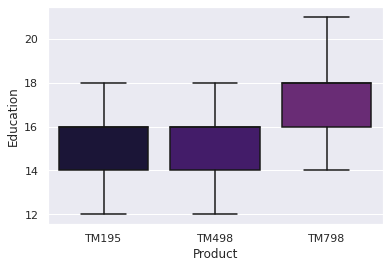

In [48]:
sns.boxplot(x = 'Product', y = 'Education', data = data)

**'TM195'**
* Minimum years of education is 12 and the maximum is 18
* IQR is 14-16 years

**'TM498'**
* Minimum years of education is 12 and the maximum is 18
* IQR is 14-16 years

**'TM798'**
* Minimum years of education is 14 and the maximum is 21
* IQR is 16-18 years

**Insights**
* Possibilities are customers with more years of education tend to have higher annual income
* Again model TM798 may be priced high

**7. Marital Status vs Usage**

<AxesSubplot:xlabel='MaritalStatus', ylabel='Usage'>

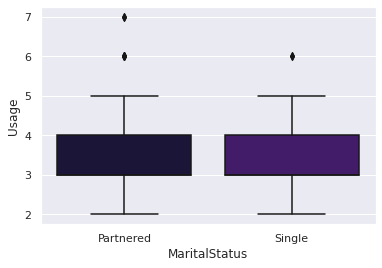

In [49]:
sns.boxplot(x = 'MaritalStatus', y = 'Usage', data = data)

* Average usage/week has significantly same values for the minimum usage/week which is 2 and maximum usage/week which is 5.
* Also the IQR in both cases is 3-4 days/week
* Outliers in case of married customers ranges until 7 days/week whereas for that of single customers it is only 6 days/week.

# Multivariate Data Analysis

**Product vs Education vs Usage vs Gender**

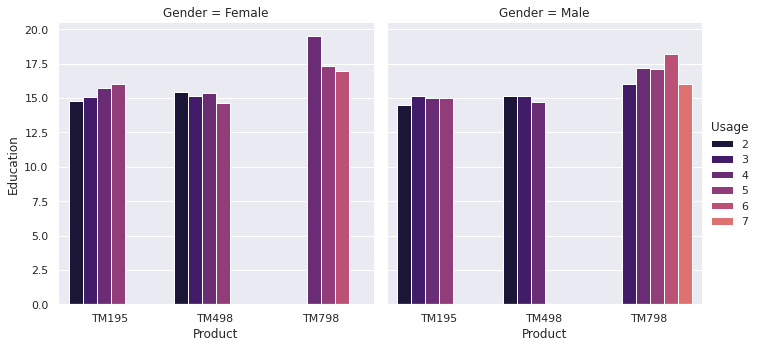

In [50]:
sns.catplot(y = 'Education', hue = 'Usage', data = data, x = 'Product', ci = None, col = 'Gender', kind = 'bar')
                    
            # creating a categorical plot arranged in columns based on gender ; 'kind' refers to the type of plot preferred

**'TM195'**
* Female : Education is 14-16 year ; usage/week ranges between 2-5 days ; maximum days being 5
* Male : Education is 14-15 years ; usage/week is 2-5 days ; maximum days being 3-5

**'TM498'**
* Female : Education is 14-15 years, usage/week ranges between 2-5 days ; maximum days being 2 and 3
* Male : Education is 14-15 years, usage/week is 2-4 days ; maximum days being 2 and 3

**'TM798'**
* Female : Education is 17-18 years, usage/week ranges between 4-6 days ; maximum days being 4
* Male : Education is 16-17 years, usage/week is 3-7 days ; maximum days being 6

**Insights**
* In general, customers with more years of education tend to earn higher.
* This in turn indicates that model TM798 could be priced higher than the other models.

**Product vs Income vs Usage vs Gender**

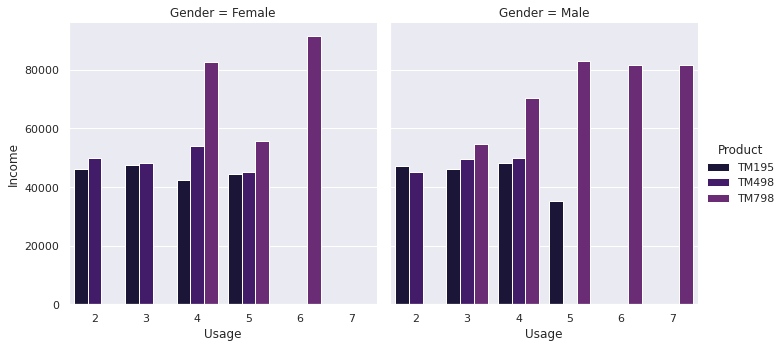

In [51]:
sns.catplot(x = 'Usage', hue = 'Product', y = 'Income', data = data, ci = None, col = 'Gender', kind = 'bar')

**'TM195'**
* Female : Average annual income ranges between 42k-44k ; average usage is 2-5 days/week
* Male : Average annual income ranges between 37k-42k ; average usage is 2-5 days/week

**'TM498'**
* Female : Average annual income ranges between 43k-54k ; average usage is 2-5 days/week
* Male : Average annual income ranges between 43k-48k ; average usage is 2-4 days/week

**'TM798'**
* Female : Average annual income ranges between 57k+ -95k+ ; average usage is 4-6 days/week
* Male : Average annual income ranges between 57k-82k ; average usage is 3-7 days/week

**Product vs Age vs Usage vs Gender**

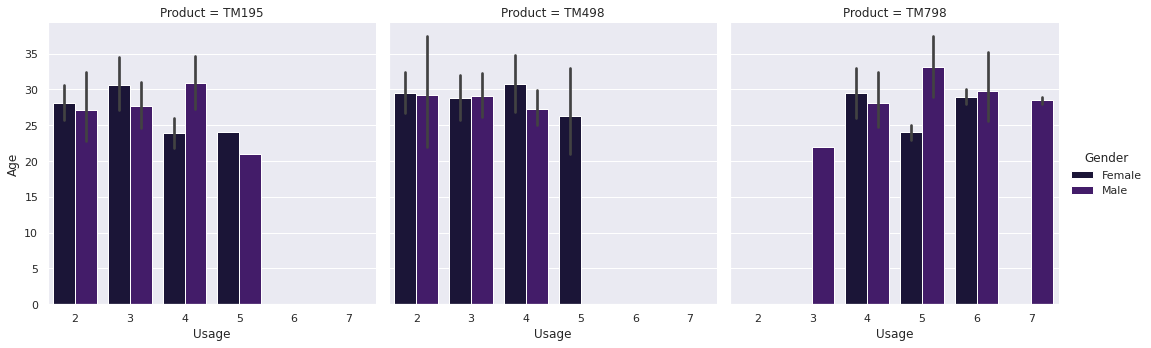

In [52]:
sns.catplot(x = 'Usage', y = 'Age', col = 'Product', data = data, hue = 'Gender', kind = 'bar')

**'TM195'**
* Female : Age of the customer ranges between 23 to 32 ; customers above 25 years use it 2-3 days/week and customers below 25 years use it 4-5 days/week on an average.
* Male : Age of the customer ranges between 22 to 32 ; customers above 25 years use it 2-4 days/week and customers below 25 years use it 5 days/week on an average

**'TM498'**
* Female : Age of the customer ranges between 26 to 32 ; customers use it 2-5 days/week on an average
* Male : Age of the customer ranges between 27-28 ; customers use it 2-4 days/week on an average

**'TM798'**
* Female : Age of the customer ranges between 23 to 28 ; customers use it 4-6 days/week on an average
* Male : Age of the customer ranges between 22 to 35 ; customers use it 3-7 days/week on an average

**Fitness vs Usage vs Product**

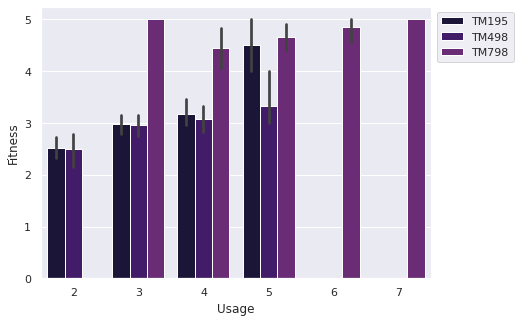

In [53]:
plt.figure(figsize = (7,5))
sns.barplot(x = 'Usage', y = 'Fitness', data = data, hue = 'Product')
plt.legend(bbox_to_anchor=(1, 1))

**'TM195'**
* Usage ranges between 2-5 days/week ; Personal fitness score ranges from 1 to 5

**'TM498'**
* Usage ranges between 2-5 days/week ; Personal fitness score ranges from 1 to 4

**'TM798'**
* Usage ranges between 3-7 days/week ; Personal fitness score ranges from 3 to 5

**Miles vs Income vs Usage**

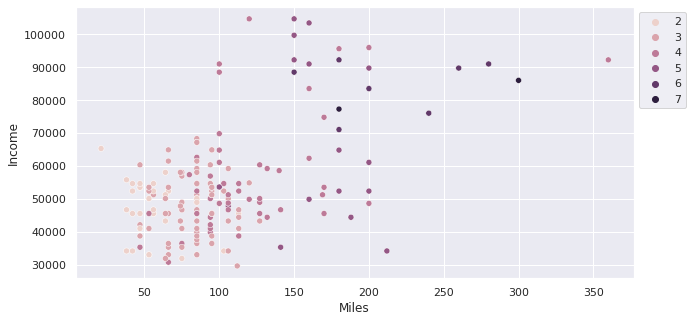

In [54]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'Miles', y = 'Income', hue = 'Usage', data = data)
plt.legend(bbox_to_anchor=(1,1))

* Customers with average annual income below 70k run only under 220 miles/week
* Customers with higher average annual income run anywhere between 100 to 360 miles/week

**Usage vs Miles vs Fitness vs Product**

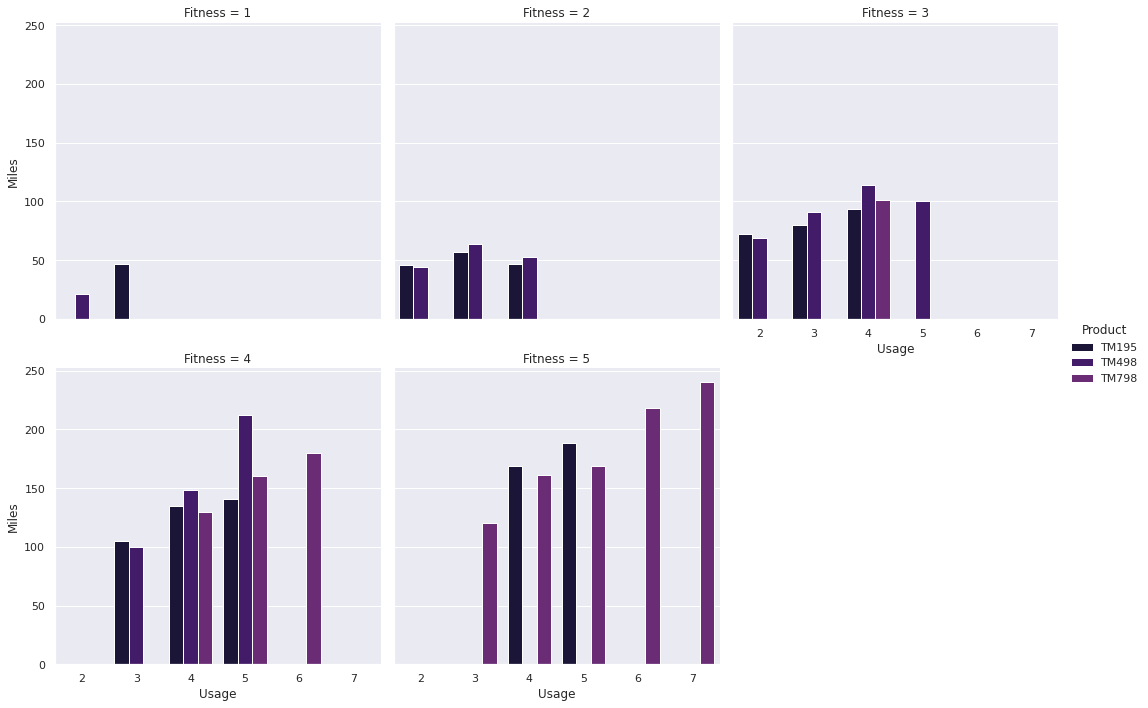

In [55]:
sns.catplot(x = 'Usage',  y = 'Miles', col = 'Fitness', data = data, hue = 'Product', kind = 'bar', ci = None, col_wrap = 3)

    # col_wrap refers where to break the column and move to the next row

* In general we can notice that as the average usage/week increases, the miles run/week increases and in turn the customers give a higher self fitness score.

**'TM195'**
* Used anywhere between 2-5 days/week ; Miles run is 40-180 miles/week ; Fitness rating is 1 to 5

**'TM498'**
* Used anywhere between 2-5 days/week ; Miles run is 20-220 miles/week ; Fitness rating is 1 to 4
* Although the customers seem to run more miles than model TM195 for the same number of days, the fitness rating still remains less than that of model 'TM195'

**'TM798'**
* Used anywhere between 3-7 days/week ; Miles run is 80-230 miles/week ; Fitness rating is 3 to 5

# Conclusion

# Customer profile based on Model Numbers

**'TM195'**
* Minimum age of the customers is 18 and the maximum is 50 years
* Equally preferred by both male and female customers
* Education is 12-18 years
* Minimum average annual income is 29.5k
* Frequent usage of the produt is 3-4 days/week
* Self fitness rating ranges from 1 to 5

**'TM498'**
* Minimum age of the customers is 19 and the maximum is 48 years
* Number of male customers is slightly above the female customers
* Education is 12-18 years
* Minimum average annual income is 31.8k
* Frequent usage of the product is 3 days/week
* Self fitness rating ranges from 1 to 4

**'TM798'**
* Minimum age of the customers is 22 and the maximum is 48 years
* Highly preferred by male customers
* Education is 14-21 years
* Minimum average annual income is 48.5k
* Frequent usage of the product is 3 days/week
* Self fitness rating ranges from 4 to 5

# Insights

* The overall percentage of male customers is greater than female customers.
* Model 'TM798' is preferred by customers with an annual income >48k which indicates that this model is highly priced and is not affordable by others.
* Higher percentage of the customers are married.
* Marital status does not influence the average usage/week.
* Usage and miles run per week have a strong correlation.
* Customers with an average annual income >70k seem to run the most anywhere between 120 and 300 miles.
* Higher usage = Higher personal fitness rating

**Note**

Model 'TM798' has the least number of observations in all. This could also be the reason for the values to look higher during comparative analysis.

# Recommendations

* Procure equal number of observations for each model in order to perform accurate analysis of the data.
* Procure more data on price and build a model that can predict optimal pricing.
* Procure data on the specifications of the treadmill model to enable better understanding of why the customer prefers one model over the other.
* Obtain observations as to why models TM195 and TM498 have a lower usage rate.
* Investigate why female customers do not prefer Model TM798.
* Suggest Model TM798 to customers who are more likely to use the product for a minimum of 4 days/week.